# Compare Regression Models

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Build DataFrame and Define Your ML Problem

In [2]:
filename = os.path.join(os.getcwd(), "data_LR", "airbnbData_train.csv")
df = pd.read_csv(filename)

df['price']

0       -0.030031
1       -0.562648
2        0.857665
3       -0.612359
4       -0.562648
           ...   
28017   -0.463226
28018    6.006297
28019   -0.640765
28020   -0.498734
28021   -0.598156
Name: price, Length: 28022, dtype: float64

## Create Labeled Examples from the Data Set 

In [3]:
y = df['price']
X = df.drop(columns = ['price'])

## Create Training and Test Data Sets

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1234)

## Train, Test and Evaluate Linear Regression and Decision Tree

### a. Train, Test and Evaluate a Linear Regression

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [7]:
# Call predict() to use the fitted model to make predictions on the test data
y_lr_pred = lr_model.predict(X_test)

In [8]:
# 1. Compute the RMSE using mean_squared_error()
lr_rmse = mean_squared_error(y_test, y_lr_pred, squared=False)

# 2. Compute the R2 score using r2_score()
lr_r2 = r2_score(y_test, y_lr_pred)

print('[LR] Root Mean Squared Error: {0}'.format(lr_rmse))
print('[LR] R2: {0}'.format(lr_r2))

[LR] Root Mean Squared Error: 0.7449290413154662
[LR] R2: 0.4743953999284285


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### b. Train, Test and Evaluate a Decision Tree Using GridSearch

In [9]:
from sklearn.tree import DecisionTreeRegressor

In [10]:
# Create a dictionary that contains possible hyperparameter values 
# for max_depth and min_samples_leaf
param_grid = {"max_depth": [4,8], "min_samples_leaf": [25,50]}

In [11]:
print('Running Grid Search...')

# 1. Create a DecisionTreeRegressor model object without supplying arguments. 
dt_regressor = DecisionTreeRegressor()


# 2. Run a Grid Search with 3-fold cross-validation and assign the output to the object 'dt_grid'.
#    * Pass the model and the parameter grid to GridSearchCV()
#    * Set the number of folds to 3
#    * Specify the scoring method (neg_root_mean_sqaured_errpr = neg RMSE)

dt_grid = GridSearchCV(dt_regressor, param_grid, cv=3, scoring='neg_root_mean_squared_error')


# 3. Fit the model (use the 'grid' variable) on the training data and assign the fitted model to the 
#    variable 'dt_grid_search'

dt_grid_search = dt_grid.fit(X_train, y_train)

print('Done')


Running Grid Search...
Done


In [12]:
#  prints the RMSE score of the best model using the best_score_ attribute
rmse_DT = -1 * dt_grid_search.best_score_
print("[DT] RMSE for the best model is : {:.2f}".format(rmse_DT) )

[DT] RMSE for the best model is : 0.72


Obtain the best model hyperparameters identified by the grid search and save them to the variable `dt_best_params`.

In [13]:
dt_best_params = dt_grid_search.best_params_

dt_best_params

{'max_depth': 8, 'min_samples_leaf': 25}

`DecisionTreeRegressor` model object, with the best values of hyperparameters `max_depth` and `min_samples_leaf` as arguments.

In [14]:
dt_model = DecisionTreeRegressor(max_depth=8, min_samples_leaf=25)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=25)

In [15]:
# 1. Use the fitted model to make predictions on the test data
y_dt_pred = dt_model.predict(X_test)


# 2. Compute the RMSE using mean_squared_error()
dt_rmse = mean_squared_error(y_test, y_dt_pred, squared=False)


# 3. Compute the R2 score using r2_score()
dt_r2 = r2_score (y_test, y_dt_pred)


print('[DT] Root Mean Squared Error: {0}'.format(dt_rmse))
print('[DT] R2: {0}'.format(dt_r2))

[DT] Root Mean Squared Error: 0.716760961165418
[DT] R2: 0.5133933582135196


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Train, Test and Evaluate Ensemble Models: Stacking 

In [2]:
# StackingRegressor combines predictions from multiple regressors
from sklearn.ensemble import StackingRegressor

In [17]:
estimators = [("DT", DecisionTreeRegressor(max_depth=8, min_samples_leaf=25)),
              ("LR", LinearRegression())
             ]

In [18]:
print('Implement Stacking...')

stacking_model = StackingRegressor(estimators=estimators, passthrough=False)
stacking_model.fit(X_train, y_train)


print('End')

Implement Stacking...
End


In [19]:
# 1. Use the fitted model to make predictions on the test data
stacking_pred = stacking_model.predict(X_test)

# 2. Compute the RMSE 
stack_rmse = mean_squared_error(y_test, stacking_pred, squared=False)


# 3. Compute the R2 score
stack_r2 = r2_score(y_test, stacking_pred)

   
print('Root Mean Squared Error: {0}'.format(stack_rmse))
print('R2: {0}'.format(stack_r2))                     

Root Mean Squared Error: 0.6930546545683466
R2: 0.5450493233994322


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Train, Test and Evaluate  Evaluate Ensemble Models: Gradient Boosted Decision Trees 

In [20]:
from sklearn.ensemble import GradientBoostingRegressor

In [28]:
print('Begin GBDT Implementation...')

gbdt_model = GradientBoostingRegressor(max_depth=2, n_estimators = 300) #best values were provided to same time
gbdt_model.fit(X_train, y_train)

print('End')

Begin GBDT Implementation...
End


In [29]:
# 1. Use the fitted model to make predictions on the test data

y_gbdt_pred = gbdt_model.predict(X_test)

# 2. Compute the RMSE 
gbdt_rmse = mean_squared_error(y_test, y_gbdt_pred, squared=False)

# 3. Compute the R2 score 
gbdt_r2 = r2_score(y_test, y_gbdt_pred)


print('[GBDT] Root Mean Squared Error: {0}'.format(gbdt_rmse))
print('[GBDT] R2: {0}'.format(gbdt_r2))                 

[GBDT] Root Mean Squared Error: 0.6609325931447689
[GBDT] R2: 0.5862445909972643


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Train, Test and Evaluate  Ensemble Models: Random Forest

You will use the scikit-learn `RandomForestRegressor` class to create a gradient boosted decision tree. For more information, consult the online [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html).

First let's import `RandomForestRegressor`:

In [30]:
from sklearn.ensemble import RandomForestRegressor

Let's assume you already performed a grid search to find the best model hyperparameters for your random forest model. (We are omitting this step to save computation time.) The best values are: `max_depth=32`, and `n_estimators = 300`. 

<b>Task</b>: Initialize a `RandomForestRegressor` model object with the above values as arguments. Save the result to the variable `rf_model`. Fit the `rf_model` model to the training data.

In [31]:
print('Begin RF Implementation...')

rf_model = RandomForestRegressor(max_depth=32, n_estimators=300)
rf_model.fit(X_train, y_train)

print('End')

Begin RF Implementation...
End


<b>Task:</b> Use the `predict()` method to test your model `rf_model` on the test set `X_test`. Save the result to the variable ``y_rf_pred``. Evaluate the results by computing the RMSE and R2 score in the same manner as you did above. Save the results to the variables `rf_rmse` and `rf_r2`.

Complete the code in the cell below to accomplish this.

In [32]:
# 1. Use the fitted model to make predictions on the test data
y_rf_pred = rf_model.predict(X_test)


# 2. Compute the RMSE 
rf_rmse = mean_squared_error(y_test, y_rf_pred, squared=False)


# 3. Compute the R2 score 
rf_r2 = r2_score(y_test, y_rf_pred)


print('[RF] Root Mean Squared Error: {0}'.format(rf_rmse))
print('[RF] R2: {0}'.format(rf_r2))                 

[RF] Root Mean Squared Error: 0.628531448351768
[RF] R2: 0.6258175875017377


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Part 8: Visualize and Compare Model Performance

The code cell below will plot the RMSE and R2 score for each regressor. 

<b>Task:</b> Complete the code in the cell below.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


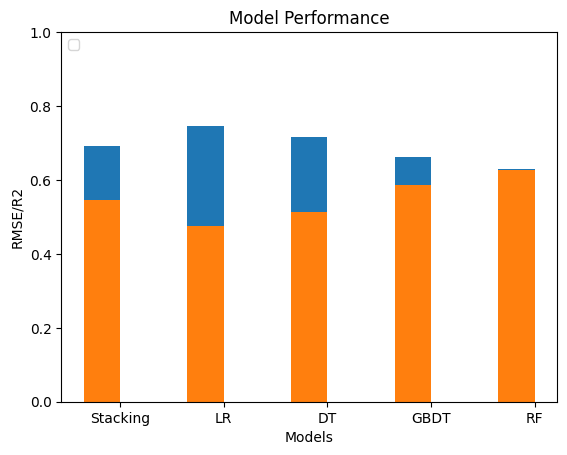

([0.6930546545683466,
  0.7449290413154662,
  0.716760961165418,
  0.6609325931447689,
  0.628531448351768],
 [0.5450493233994322,
  0.4743953999284285,
  0.5133933582135196,
  0.5862445909972643,
  0.6258175875017377])

In [37]:
RMSE_Results = [stack_rmse, lr_rmse, dt_rmse, gbdt_rmse, rf_rmse]
R2_Results = [stack_r2, lr_r2, dt_r2, gbdt_r2, rf_r2]

rg= np.arange(5)
width = 0.35

# 1. Create bar plot with RMSE results
plt.bar(rg, RMSE_Results, width=width)


# 2. Create bar plot with R2 results
plt.bar(rg, R2_Results, width=width)


labels = ['Stacking','LR', 'DT', 'GBDT', 'RF']
plt.xticks(rg + width/2, labels)

plt.xlabel("Models")
plt.ylabel("RMSE/R2")


plt.ylim([0,1])
plt.title('Model Performance')
plt.legend(loc='upper left', ncol=2)
plt.show()

RMSE_Results, R2_Results


<b>Analysis</b>: Compare and contrast the resulting $R^2$ and RSME scores of the ensemble models and the individual models. Are the ensemble models performing better? Which is the best performing model? Explain.

Yes generally speaking, the ensemble models are performing better than the indivisual models with a the most even RSME and R squared values. The Random Forest has a RSME of 0.628 and a R squared value of 0.625. Although the indivisual models have higher RSME scores their overal R squared values are lower. Other than the Random Forest Model the stacking model seems to be good as well.